### We will make a regressor model and try to predict the price of the houses for the given dataset.

In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housing_data = pd.read_csv('data.csv')
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [3]:
housing_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
# We will check the correlation of each features with our label 'MEDV' which is the house price
corelation = housing_data.corr()

In [5]:
corelation['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

In [6]:
# Dropping column with less relevance to avoid overfitting or model deviation

housing_data.drop(['B','DIS','CHAS','AGE','RAD','CRIM'],axis=1,inplace=True)

In [7]:
housing_data.shape

(506, 8)

In [8]:
housing_data.head()

,ZN,INDUS,NOX,RM,TAX,PTRATIO,LSTAT,MEDV
0,18.0,2.31,0.538,6.575,296,15.3,4.98,24.0
1,0.0,7.07,0.469,6.421,242,17.8,9.14,21.6
2,0.0,7.07,0.469,7.185,242,17.8,4.03,34.7
3,0.0,2.18,0.458,6.998,222,18.7,2.94,33.4
4,0.0,2.18,0.458,7.147,222,18.7,5.33,36.2


In [9]:
corelation = housing_data.corr()
corelation['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

In [10]:
housing_data.drop('ZN',axis=1,inplace=True)

In [11]:
housing_data.head()

,INDUS,NOX,RM,TAX,PTRATIO,LSTAT,MEDV
0,2.31,0.538,6.575,296,15.3,4.98,24.0
1,7.07,0.469,6.421,242,17.8,9.14,21.6
2,7.07,0.469,7.185,242,17.8,4.03,34.7
3,2.18,0.458,6.998,222,18.7,2.94,33.4
4,2.18,0.458,7.147,222,18.7,5.33,36.2


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [13]:
features = housing_data.iloc[:,:6]
print(features.shape)
label = housing_data.iloc[:,-1]
label.shape

(506, 6)


(506,)

In [14]:
print(features.head())
label.head()

   INDUS    NOX     RM  TAX  PTRATIO  LSTAT
0   2.31  0.538  6.575  296     15.3   4.98
1   7.07  0.469  6.421  242     17.8   9.14
2   7.07  0.469  7.185  242     17.8   4.03
3   2.18  0.458  6.998  222     18.7   2.94
4   2.18  0.458  7.147  222     18.7   5.33


0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [15]:
# Spliting our data into training and testing set

x_train,x_test,y_train,y_test = train_test_split(features,label,test_size=0.2,random_state=47,shuffle=True)

In [16]:
# Create a pipeline using sklearn pipeline object

pipe = Pipeline([('scaler',StandardScaler()),('model',LinearRegression())])
pipe.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [17]:
from sklearn.metrics import mean_squared_error

In [18]:
# Using polynomial features object to convert features into polynomial

poly = PolynomialFeatures(degree=2)
x_train_pr = poly.fit_transform(x_train)
x_test_pr = poly.fit_transform(x_test)

In [19]:
pipe.fit(x_train_pr,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [20]:
print(pipe.score(x_train_pr,y_train))
pipe.score(x_test_pr,y_test)


0.8289701496696755


0.8761590686355973

### In the training set we got an accuracy of 82.89% and an accuracy of 87.61% in the testing set which is quite good

In [21]:
poly_train_predict = pipe.predict(x_train_pr)
poly_test_predict = pipe.predict(x_test_pr)

In [22]:
mean_squared_error(y_train,poly_train_predict)

14.595671866256664

In [23]:
mean_squared_error(y_test,poly_test_predict)

9.937912522268979

### We will now convert the original value and our predicted value into a pandas dataframe and then visually analyze the accuracy of our predictions

In [31]:
df = pd.DataFrame(y_train.tolist(),poly_train_predict.tolist())

In [32]:
df.head()

,0
18.917079,19.3
14.226229,14.1
17.153949,18.4
36.322912,35.4
18.238591,21.8


In [34]:
df.columns = ['Actual Values']

In [35]:
df['Predicted Values'] = poly_train_predict.tolist()

In [36]:
df.shape

(404, 2)

In [39]:
df.reset_index(inplace=True,drop=True)

In [41]:
df.drop('index',axis=1)

,Actual Values,Predicted Values
0,19.3,18.917079
1,14.1,14.226229
2,18.4,17.153949
3,35.4,36.322912
4,21.8,18.238591
...,...,...
399,22.8,22.129989
400,36.5,35.364562
401,22.2,20.097100
402,15.1,15.591233


### From the graph below we can observe that our predicted values are very close to the actual values and the model is a success

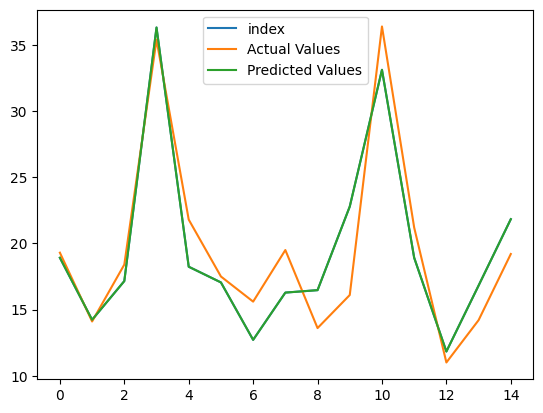

In [44]:
df.iloc[:15].plot(kind='line')
plt.show()